## The HR diagram

- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning**: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?



### For later: come back to this assignment after lecture 20
- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import urllib.request
from numpy import genfromtxt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

plt.rcParams["figure.figsize"] = (8, 8)

In [5]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

data_all = pd.read_csv("stars.csv")

In [6]:
#Assign to every class a number

le = LabelEncoder()
data_all["Star type"] = le.fit_transform(data_all["Star type"])
labels = le.inverse_transform(data_all["Star type"])
classes = le.classes_

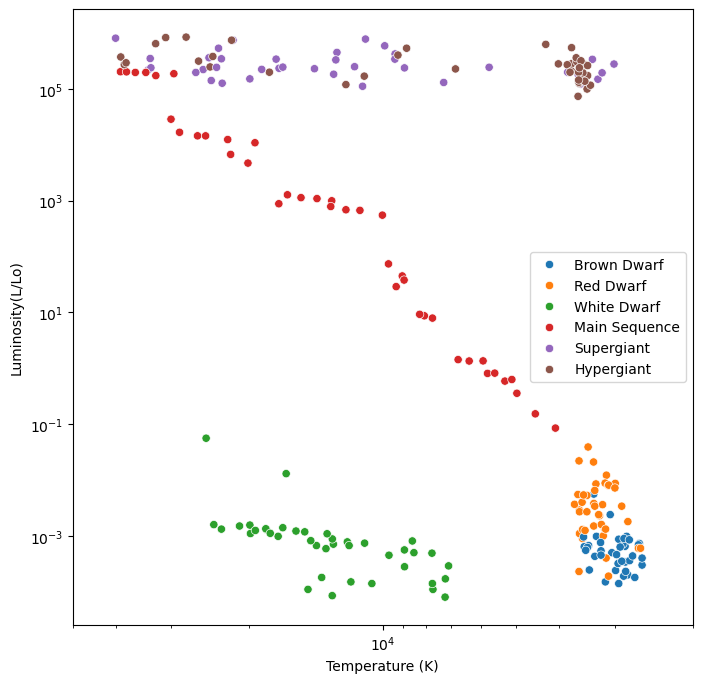

In [7]:
plt.figure()
sns.scatterplot(data_all, x="Temperature (K)", y="Luminosity(L/Lo)", hue=labels)
plt.xscale("log")
plt.yscale("log")
plt.xlim(5e4, 2e3)
plt.legend()

## Principal component analysis

(array([], dtype=int64), array([], dtype=int64))


Text(0, 0.5, 'Component 1')

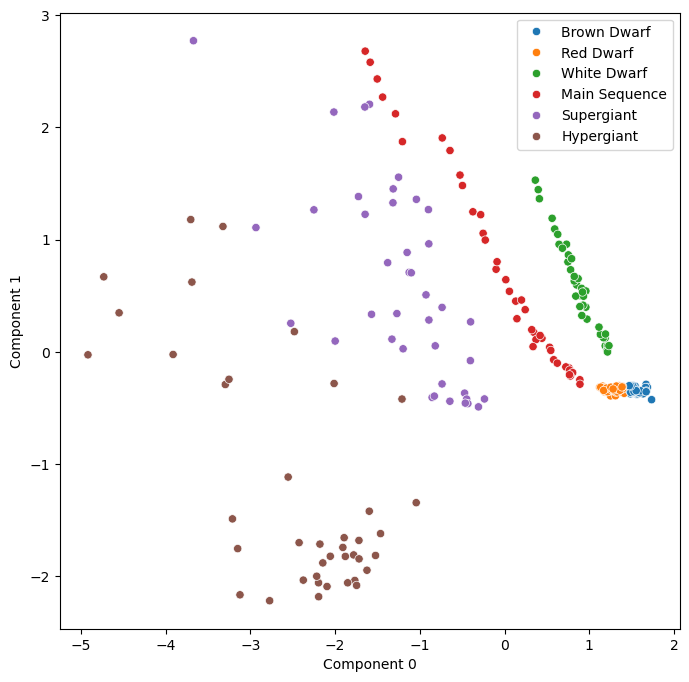

In [9]:
data = np.array(data_all.drop(columns=["Star type", "Spectral Class", "Star color"]))
print(np.where(np.isnan(data))) #No nan/missing data

#Scale the data first

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Do PCA

pca = PCA()
pca.fit(data_scaled)
data_red = pca.transform(data_scaled)

plt.figure()
sns.scatterplot(x=data_red[:, 0], y=data_red[:, 1], hue=labels)
plt.xlabel("Component 0")
plt.ylabel("Component 1")

C:\Users\Utente\AppData\Local\Temp\ipykernel_7840\1397964469.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_scree[1, 0].set_yticklabels(["{:,.1%}".format(y) for y in axes_scree[1, 0].get_yticks()])
C:\Users\Utente\AppData\Local\Temp\ipykernel_7840\1397964469.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_scree[1, 1].set_yticklabels(["{:,.1%}".format(y) for y in axes_scree[1, 1].get_yticks()])


[Text(0, 0.55, '55.0%'),
 Text(0, 0.6000000000000001, '60.0%'),
 Text(0, 0.65, '65.0%'),
 Text(0, 0.7000000000000001, '70.0%'),
 Text(0, 0.75, '75.0%'),
 Text(0, 0.8, '80.0%'),
 Text(0, 0.8500000000000001, '85.0%'),
 Text(0, 0.9000000000000001, '90.0%'),
 Text(0, 0.9500000000000001, '95.0%'),
 Text(0, 1.0, '100.0%'),
 Text(0, 1.05, '105.0%')]

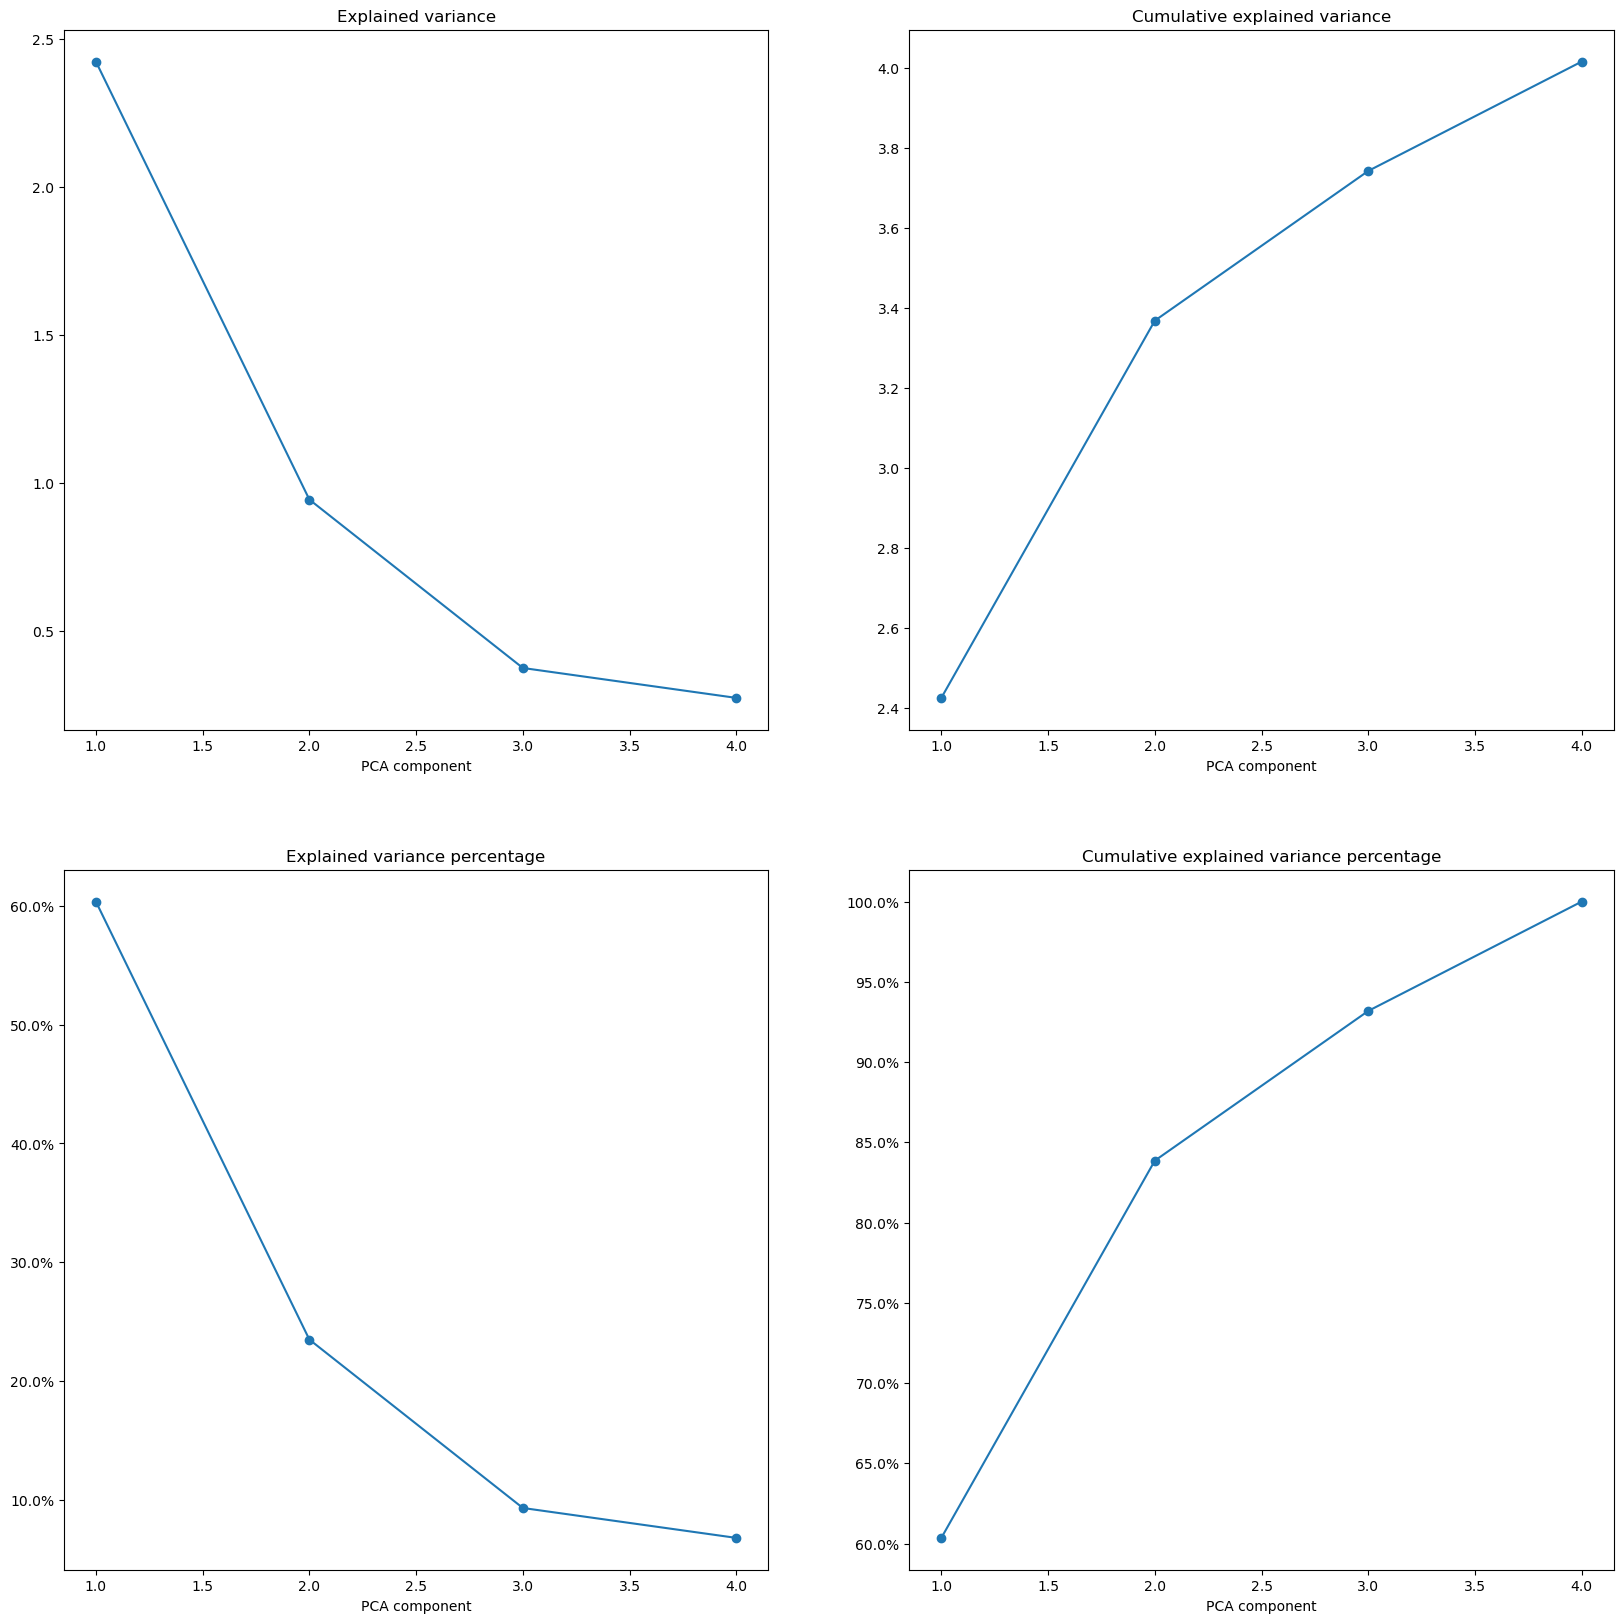

In [10]:
ex_var = pca.explained_variance_
ex_var_ratio = pca.explained_variance_ratio_
n_comp = pca.n_components_

#Scree plots with explained variance of all components

fig_scree, axes_scree = plt.subplots(2, 2, figsize=(20, 20))
axes_scree[0, 0].plot(np.arange(0, n_comp) + 1, ex_var, marker="o")
axes_scree[0, 1].plot(np.arange(0, n_comp) + 1, np.cumsum(ex_var), marker="o")
axes_scree[1, 0].plot(np.arange(0, n_comp) + 1, ex_var_ratio, marker="o")
axes_scree[1, 1].plot(np.arange(0, n_comp) + 1, np.cumsum(ex_var_ratio), marker="o")

axes_scree[0, 0].set_title("Explained variance")
axes_scree[0, 0].set_xlabel("PCA component")

axes_scree[0, 1].set_title("Cumulative explained variance")
axes_scree[0, 1].set_xlabel("PCA component")

axes_scree[1, 0].set_title("Explained variance percentage")
axes_scree[1, 0].set_xlabel("PCA component")
axes_scree[1, 0].set_yticklabels(["{:,.1%}".format(y) for y in axes_scree[1, 0].get_yticks()])

axes_scree[1, 1].set_title("Cumulative explained variance percentage")
axes_scree[1, 1].set_xlabel("PCA component")
axes_scree[1, 1].set_yticklabels(["{:,.1%}".format(y) for y in axes_scree[1, 1].get_yticks()])

## Classification

In [12]:
train_X, test_X, train_y, test_y = train_test_split(data_red, labels, train_size=0.75)

Classes order: 
['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


Train:
0.9388888888888889
[[29  0  0  0  0  0]
 [ 0 26  1  0  0  0]
 [ 0  0 28  0  4  0]
 [ 1  0  0 30  0  0]
 [ 0  1  4  0 21  0]
 [ 0  0  0  0  0 35]]


Test:
0.9666666666666667
[[11  0  0  0  0  0]
 [ 0 12  1  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  1  0 13  0]
 [ 0  0  0  0  0  5]]


Text(0.5, 1.0, 'True (test set)')

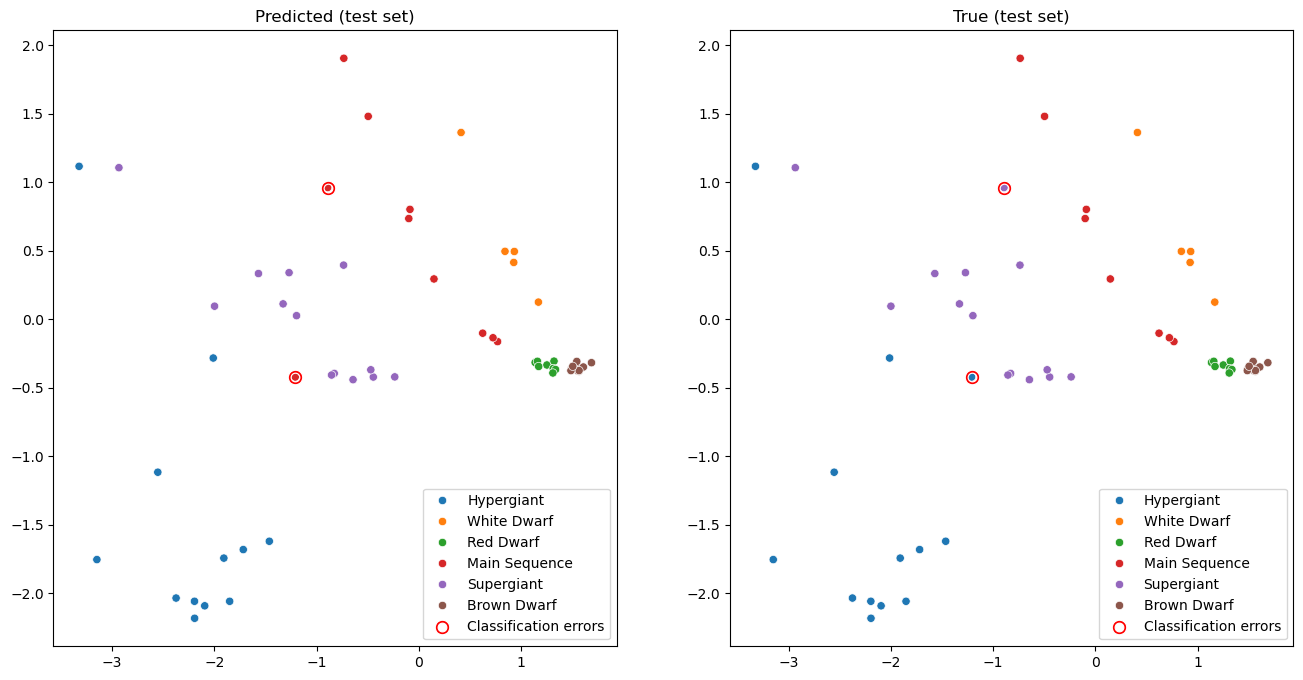

In [13]:
#Classification with gaussian naive Bayes

gnb = GaussianNB()
gnb.fit(train_X, train_y)

pred_train = gnb.predict(train_X)
pred_test = gnb.predict(test_X)

#Accuracy and confusion matrix for train and test sets

score_train = accuracy_score(train_y, pred_train)
C_train = confusion_matrix(train_y, pred_train)

score_test = accuracy_score(test_y, pred_test)
C_test = confusion_matrix(test_y, pred_test)

#Classification errors

wrong = np.where(pred_test != test_y)[0]
pred_wrong = pred_test[wrong]
X_wrong = test_X[wrong]

print("Classes order: ")    #Order of the classes as they appear in the confusion matrix
print(classes)

print("\n")

print("Train:")
print(score_train)
print(C_train)

print("\n")

print("Test:")
print(score_test)
print(C_test)

#Plot predicted labels of the test set

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(x=test_X[:, 0], y=test_X[:, 1], hue=pred_test, ax=axes[0])
sns.scatterplot(x=X_wrong[:, 0], y=X_wrong[:, 1], color="red", marker="$\circ$", s=110, ax=axes[0], label="Classification errors")
sns.scatterplot(x=test_X[:, 0], y=test_X[:, 1], hue=test_y, ax=axes[1])
sns.scatterplot(x=X_wrong[:, 0], y=X_wrong[:, 1], color="red", marker="$\circ$", s=110, ax=axes[1], label="Classification errors")
axes[0].set_title("Predicted (test set)")
axes[1].set_title("True (test set)")